# hypo-2 노령화 지수가 높은 곳일수록 전통시장, 공원 등 주요 문화시설이 많을 것이다.

## import

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import googlemaps
import seaborn as sns
from matplotlib import rc 
rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False  

In [52]:
# 노령화 지수
old_point = pd.read_excel('./data/자치구별+노령화지수(추계인구)_20240929181758.xlsx')
old_point.head()

,자치구별(1),자치구별(2),2023,2023.1,2023.2
0,자치구별(1),자치구별(2),합계,남자,여자
1,합계,소계,199.1,171.6,228.2
2,NaN,종로구,267.8,237.3,298
3,NaN,중구,286.5,245.3,329.3
4,NaN,용산구,200.7,172.2,230


In [53]:
old_point.drop(index=[0, 1], columns=["자치구별(1)"], inplace=True)
old_point.columns = ['구별', '합계', '남자', '여자']
old_point.reset_index(drop=True, inplace=True)
old_point.head()

,구별,합계,남자,여자
0,종로구,267.8,237.3,298
1,중구,286.5,245.3,329.3
2,용산구,200.7,172.2,230
3,성동구,193.4,167.5,219.9
4,광진구,211.1,183.7,240.1


In [54]:
# 공원
park = pd.read_csv('./data/KC_ODSN_WALK_RECOMEND_LIST_2023.csv')
park.head()

,ESNTL_ID,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_CD,CTPRVN_NM,SIGNGU_CD,SIGNGU_NM,LEGALDONG_CD,LEGALDONG_NM,...,BULD_MANAGE_CD,TEL_NO,ZIP_NO,HMPG_URL,FCLTY_LA,FCLTY_LO,ORIGIN_NM,ADIT_DC,UPDT_DT,REGIST_DT
0,KCOWRPO23N000000001,쇼핑시설,쇼핑시설_전통시장,원미부흥시장,41,경기도,41190,부천시 원미구,4119010100,원미동,...,4119510100101180000000000,0.0,14571.0,0.0,37.553516,126.921715,공공데이터,상설장,20231231,20231231
1,KCOWRPO23N000000002,쇼핑시설,쇼핑시설_전통시장,원미종합시장,41,경기도,41190,부천시 원미구,4119010100,원미동,...,4119510100100970000000000,0.0,14568.0,0.0,37.545392,126.953319,공공데이터,상설장,20231231,20231231
2,KCOWRPO23N000000003,자연,자연_공원,원미별빛,41,경기도,41190,부천시 원미구,4119010100,원미동,...,4119510100101270000000000,0.0,14571.0,0.0,37.491966,126.787309,공공데이터,-,20231231,20231231
3,KCOWRPO23N000000004,자연,자연_공원,원미,41,경기도,41190,부천시 원미구,4119010100,원미동,...,4119510100100150000000000,0.0,14659.0,0.0,37.497985,126.799040,공공데이터,-,20231231,20231231
4,KCOWRPO23N000000005,쇼핑시설,쇼핑시설_전통시장,음성시장,43,충청북도,43770,음성군,4377025021,읍내리,...,4377025021102490000000000,0.0,27697.0,0.0,36.938166,127.692127,공공데이터,5일장,20231231,20231231


In [55]:
# 문화시설

culture = pd.read_csv('./data/KC_485_DMSTC_MCST_OLDLSR_2023.csv')
culture.head()

,ID,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,LEGALDONG_CD,LEGALDONG_NM,ADSTRD_CD,ADSTRD_NM,...,FCLTY_LO,FCLTY_LA,OPER_INSTT_NM,TEL_NO,LC_LO,LC_LA,LAST_CHG_DE,ORIGIN_NM,FILE_NM,BASE_DE
0,KC485PC23N000000000001,문화시설,복지관,1004가족복지센터,전라북도,익산시,5214011400,모현동1가,5214061000,모현동,...,126.946306,35.949725,NaN,NaN,9.500649e+05,1.772699e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
1,KC485PC23N000000000002,문화시설,복지관,1004가족재가복지센터,경기도,화성시,4159025325,봉담읍 와우리,4159025300,봉담읍,...,126.972771,37.215112,NaN,NaN,9.532215e+05,1.913051e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
2,KC485PC23N000000000003,문화시설,복지관,1004엔젤스방문요양센터,경기도,고양시 일산서구,4128710500,덕이동,4128760000,덕이동,...,126.751049,37.699774,NaN,NaN,9.339764e+05,1.966954e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
3,KC485PC23N000000000004,문화시설,복지관,100세고성재가복지센터,경상남도,고성군,4882025021,고성읍 성내리,4882025000,고성읍,...,128.321049,34.974063,NaN,NaN,1.074947e+06,1.664660e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
4,KC485PC23N000000000005,문화시설,복지관,100세노인복지센터,경상남도,진주시,4817012500,신안동,4817071500,신안동,...,128.071955,35.185477,NaN,NaN,1.052074e+06,1.687947e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231


In [56]:
tour = pd.read_csv('./data/RB_SR_TURIST_TURSM_INFO_20221231.csv')
tour.head()

/var/folders/76/295r32t542b3jtvsn34n34s00000gn/T/ipykernel_1360/3793178725.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  tour = pd.read_csv('./data/RB_SR_TURIST_TURSM_INFO_20221231.csv')


,FLAG_NM,FCLTY_NM,RDNMADR_NM,CTPRVN_KLANG_NM,SIGNGU_KLANG_NM,CTPRVN_ENG_NM,SIGNGU_ENG_NM,CTPRVN_CHNLNG_NM,SIGNGU_CHNLNG_NM,CTPRVN_JLANG_NM,SIGNGU_JLANG_NM,CTPRVN_CD,SIGNGU_CD,FCLTY_LO,FCLTY_LA,HMPG_URL,TEL_NO,REGIST_DE
0,노인복지시설,새실경로당,김천시 새실길 18-3 (다수동),경상북도,김천시,Gyeongsangbuk-do,Gimcheonsi,慶尙北道,金泉市,慶?北道（キョンサンブクト),金泉市(キムチョンシ),37,37030,129.471868,42.909408,NaN,NaN,20221231
1,노인복지시설,각리3리경로당,영덕군 병곡면 신평1길 24,경상북도,영덕군,Gyeongsangbuk-do,Yeongdeokgun,慶尙北道,盈德郡,慶?北道（キョンサンブクト),盈?郡（ヨンドクグン）,37,37350,129.471868,42.909408,NaN,NaN,20221231
2,관광호텔,데이즈 호텔 명동,NaN,서울특별시,중구,Seoul,Junggu,首爾特別市,中區,ソウル特別市,中?（チュング）,11,11020,123.431472,41.805699,NaN,NaN,20221231
3,노인복지시설,신도2리경로당,청도군 청도읍 신도1길 49,경상북도,청도군,Gyeongsangbuk-do,Cheongdogun,慶尙北道,淸道郡,慶?北道（キョンサンブクト),?道郡（チョンドグン）,37,37360,123.431472,41.805699,NaN,NaN,20221231
4,노인복지시설,국제경로당,"부산광역시 연제구 연수로 184(연산3동, 국제아파트)",부산광역시,연제구,Busan,Yeonjegu,釜山廣域市,蓮堤區,釜山（プサン）?域市,蓮堤?（ヨンジェグ）,21,21130,128.573767,38.194816,NaN,NaN,20221231


## preprocessing

### culture

In [57]:
culture_seoul = culture[culture['CTPRVN_NM'].str.contains('서울')]
culture_seoul.head()

,ID,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,LEGALDONG_CD,LEGALDONG_NM,ADSTRD_CD,ADSTRD_NM,...,FCLTY_LO,FCLTY_LA,OPER_INSTT_NM,TEL_NO,LC_LO,LC_LA,LAST_CHG_DE,ORIGIN_NM,FILE_NM,BASE_DE
17,KC485PC23N000000000018,문화시설,복지관,1318상상발전소,서울특별시,중랑구,1126010400,묵동,1126063000,묵2동,...,127.077072,37.606135,NaN,NaN,962670.272236,1.956385e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
18,KC485PC23N000000000019,문화시설,복지관,1318해피존,서울특별시,용산구,1117012800,한강로3가,1117062500,한강로동,...,126.956555,37.531929,NaN,NaN,951985.086624,1.948207e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
29,KC485PC23N000000000030,문화시설,복지관,153재가장기요양기관,서울특별시,중랑구,1126010100,면목동,1126057000,면목7동,...,127.083549,37.578477,NaN,NaN,963228.320845,1.953314e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
71,KC485PC23N000000000072,문화시설,노인정/노인회관,3단지아파트노인정,서울특별시,강서구,1150010400,가양동,1150060400,가양2동,...,126.856279,37.564612,NaN,NaN,943150.174500,1.951889e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
102,KC485PC23N000000000103,문화시설,복지관,99팔팔재가노인복지센터,서울특별시,강서구,1150010300,화곡동,1150059100,화곡6동,...,126.854230,37.554832,NaN,NaN,942961.762211,1.950805e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231


In [58]:
culture_seoul.drop(columns=['ID', 'LEGALDONG_CD', 'OPER_INSTT_NM', 'TEL_NO', "ORIGIN_NM", "LAST_CHG_DE", "FILE_NM",
                        'BASE_DE', 'LCLAS_NM', 'ADSTRD_CD', 'LEGALDONG_NM', 'RDNMADR_CD', 'ADSTRD_NM', 'GID_CD', 
                        "ZIP_NO", "LC_LO", "LC_LA"], inplace=True)
culture_seoul.reset_index(drop=True, inplace=True)
culture_seoul.head()

/var/folders/76/295r32t542b3jtvsn34n34s00000gn/T/ipykernel_1360/94473864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  culture_seoul.drop(columns=['ID', 'LEGALDONG_CD', 'OPER_INSTT_NM', 'TEL_NO', "ORIGIN_NM", "LAST_CHG_DE", "FILE_NM",


,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
0,복지관,1318상상발전소,서울특별시,중랑구,서울특별시 중랑구 묵동 중랑역로 142,127.077072,37.606135
1,복지관,1318해피존,서울특별시,용산구,서울특별시 용산구 한강로3가 청파로 46,126.956555,37.531929
2,복지관,153재가장기요양기관,서울특별시,중랑구,서울특별시 중랑구 면목동 사가정로46가길 3-5,127.083549,37.578477
3,노인정/노인회관,3단지아파트노인정,서울특별시,강서구,서울특별시 강서구 가양동 허준로 139,126.856279,37.564612
4,복지관,99팔팔재가노인복지센터,서울특별시,강서구,서울특별시 강서구 화곡동 공항대로 426,126.854230,37.554832


In [59]:
culture_seoul['MLSFC_NM'].value_counts()

MLSFC_NM
노인정/노인회관    1492
복지관         1195
보육원/양로원      318
마을/새마을회관      51
Name: count, dtype: int64

### tour

In [60]:
tour.head()

,FLAG_NM,FCLTY_NM,RDNMADR_NM,CTPRVN_KLANG_NM,SIGNGU_KLANG_NM,CTPRVN_ENG_NM,SIGNGU_ENG_NM,CTPRVN_CHNLNG_NM,SIGNGU_CHNLNG_NM,CTPRVN_JLANG_NM,SIGNGU_JLANG_NM,CTPRVN_CD,SIGNGU_CD,FCLTY_LO,FCLTY_LA,HMPG_URL,TEL_NO,REGIST_DE
0,노인복지시설,새실경로당,김천시 새실길 18-3 (다수동),경상북도,김천시,Gyeongsangbuk-do,Gimcheonsi,慶尙北道,金泉市,慶?北道（キョンサンブクト),金泉市(キムチョンシ),37,37030,129.471868,42.909408,NaN,NaN,20221231
1,노인복지시설,각리3리경로당,영덕군 병곡면 신평1길 24,경상북도,영덕군,Gyeongsangbuk-do,Yeongdeokgun,慶尙北道,盈德郡,慶?北道（キョンサンブクト),盈?郡（ヨンドクグン）,37,37350,129.471868,42.909408,NaN,NaN,20221231
2,관광호텔,데이즈 호텔 명동,NaN,서울특별시,중구,Seoul,Junggu,首爾特別市,中區,ソウル特別市,中?（チュング）,11,11020,123.431472,41.805699,NaN,NaN,20221231
3,노인복지시설,신도2리경로당,청도군 청도읍 신도1길 49,경상북도,청도군,Gyeongsangbuk-do,Cheongdogun,慶尙北道,淸道郡,慶?北道（キョンサンブクト),?道郡（チョンドグン）,37,37360,123.431472,41.805699,NaN,NaN,20221231
4,노인복지시설,국제경로당,"부산광역시 연제구 연수로 184(연산3동, 국제아파트)",부산광역시,연제구,Busan,Yeonjegu,釜山廣域市,蓮堤區,釜山（プサン）?域市,蓮堤?（ヨンジェグ）,21,21130,128.573767,38.194816,NaN,NaN,20221231


In [61]:
tour.drop(columns=['CTPRVN_ENG_NM', 'SIGNGU_ENG_NM', 'CTPRVN_CHNLNG_NM', 'SIGNGU_CHNLNG_NM',
                   'CTPRVN_JLANG_NM', 'SIGNGU_JLANG_NM', 'CTPRVN_CD', 'SIGNGU_CD', 'HMPG_URL', 'TEL_NO', 'REGIST_DE'], inplace=True)
tour.head()

,FLAG_NM,FCLTY_NM,RDNMADR_NM,CTPRVN_KLANG_NM,SIGNGU_KLANG_NM,FCLTY_LO,FCLTY_LA
0,노인복지시설,새실경로당,김천시 새실길 18-3 (다수동),경상북도,김천시,129.471868,42.909408
1,노인복지시설,각리3리경로당,영덕군 병곡면 신평1길 24,경상북도,영덕군,129.471868,42.909408
2,관광호텔,데이즈 호텔 명동,NaN,서울특별시,중구,123.431472,41.805699
3,노인복지시설,신도2리경로당,청도군 청도읍 신도1길 49,경상북도,청도군,123.431472,41.805699
4,노인복지시설,국제경로당,"부산광역시 연제구 연수로 184(연산3동, 국제아파트)",부산광역시,연제구,128.573767,38.194816


In [62]:
tour_seoul = tour[tour['CTPRVN_KLANG_NM'].str.contains('서울')]
tour_seoul.reset_index(drop=True, inplace=True)
tour_seoul.head()

,FLAG_NM,FCLTY_NM,RDNMADR_NM,CTPRVN_KLANG_NM,SIGNGU_KLANG_NM,FCLTY_LO,FCLTY_LA
0,관광호텔,데이즈 호텔 명동,NaN,서울특별시,중구,123.431472,41.805699
1,노인복지시설,한신아파트경로당,서울특별시 도봉구 도봉동 30-1번지,서울특별시,도봉구,127.041248,37.690244
2,노인복지시설,하계경로당,서울특별시 노원구 하계동 65-41번지,서울특별시,노원구,127.049245,37.689957
3,노인복지시설,서원아파트경로당,서울특별시 도봉구 도봉동 18-2번지,서울특별시,도봉구,127.042773,37.688896
4,노인복지시설,서광아파트경로당,서울특별시 도봉구 도봉동 643번지,서울특별시,도봉구,127.048673,37.687664


In [63]:
tour_seoul['SIGNGU_KLANG_NM'].value_counts()

SIGNGU_KLANG_NM
강남구     288
강서구     263
노원구     240
영등포구    222
구로구     208
마포구     199
성북구     195
서초구     192
송파구     187
성동구     185
은평구     177
양천구     173
중구      154
동대문구    151
강동구     147
동작구     141
도봉구     139
서대문구    134
중랑구     129
관악구     127
용산구     126
종로구     118
강북구     111
광진구     107
금천구      98
Name: count, dtype: int64

### merge to culture & tour

In [64]:
print(f"culture_seoul_dataframe rows = {culture_seoul.shape[0]}")
print(f"tour_seoul_dataframe rows = {tour_seoul.shape[0]}")

culture_seoul_dataframe rows = 3056
tour_seoul_dataframe rows = 4211


In [65]:
culture_seoul.head()

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
0,복지관,1318상상발전소,서울특별시,중랑구,서울특별시 중랑구 묵동 중랑역로 142,127.077072,37.606135
1,복지관,1318해피존,서울특별시,용산구,서울특별시 용산구 한강로3가 청파로 46,126.956555,37.531929
2,복지관,153재가장기요양기관,서울특별시,중랑구,서울특별시 중랑구 면목동 사가정로46가길 3-5,127.083549,37.578477
3,노인정/노인회관,3단지아파트노인정,서울특별시,강서구,서울특별시 강서구 가양동 허준로 139,126.856279,37.564612
4,복지관,99팔팔재가노인복지센터,서울특별시,강서구,서울특별시 강서구 화곡동 공항대로 426,126.854230,37.554832


In [69]:
culture_seoul[culture_seoul['RDNMADR_NM'].str.contains('번지')]

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA


In [66]:
tour_seoul = tour_seoul[tour_seoul['FLAG_NM'] == '노인복지시설']
tour_seoul.reset_index(drop=True, inplace=True)
tour_seoul.head()

,FLAG_NM,FCLTY_NM,RDNMADR_NM,CTPRVN_KLANG_NM,SIGNGU_KLANG_NM,FCLTY_LO,FCLTY_LA
0,노인복지시설,한신아파트경로당,서울특별시 도봉구 도봉동 30-1번지,서울특별시,도봉구,127.041248,37.690244
1,노인복지시설,하계경로당,서울특별시 노원구 하계동 65-41번지,서울특별시,노원구,127.049245,37.689957
2,노인복지시설,서원아파트경로당,서울특별시 도봉구 도봉동 18-2번지,서울특별시,도봉구,127.042773,37.688896
3,노인복지시설,서광아파트경로당,서울특별시 도봉구 도봉동 643번지,서울특별시,도봉구,127.048673,37.687664
4,노인복지시설,약수경로당,서울특별시 도봉구 도봉동 454-14번지,서울특별시,도봉구,127.041647,37.686535


In [67]:
tour_seoul.rename(columns={'FLAG_NM' : "MLSFC_NM", "CTPRVN_KLANG_NM" : "CTPRVN_NM", "SIGNGU_KLANG_NM":"SIGNGU_NM"}, inplace=True)
tour_seoul.head()

,MLSFC_NM,FCLTY_NM,RDNMADR_NM,CTPRVN_NM,SIGNGU_NM,FCLTY_LO,FCLTY_LA
0,노인복지시설,한신아파트경로당,서울특별시 도봉구 도봉동 30-1번지,서울특별시,도봉구,127.041248,37.690244
1,노인복지시설,하계경로당,서울특별시 노원구 하계동 65-41번지,서울특별시,노원구,127.049245,37.689957
2,노인복지시설,서원아파트경로당,서울특별시 도봉구 도봉동 18-2번지,서울특별시,도봉구,127.042773,37.688896
3,노인복지시설,서광아파트경로당,서울특별시 도봉구 도봉동 643번지,서울특별시,도봉구,127.048673,37.687664
4,노인복지시설,약수경로당,서울특별시 도봉구 도봉동 454-14번지,서울특별시,도봉구,127.041647,37.686535


### api

In [81]:
import requests
import json

path = '/v2/local/search/address.json'
api_host = 'https://dapi.kakao.com'
api_key = '275fa9c9b83625900bee1dc000fd7dcb'
url = api_host+path

header = {
    "Authorization" : f'KakaoAK {api_key}'
}

body = {
    "format" : "json",
    'query' : "서울특별시 도봉구 도봉동 30-1번지"
}

response = requests.get(url = url, params=body, headers=header)

response.text

'{"documents":[{"address":{"address_name":"서울 도봉구 도봉동 30-1","b_code":"1132010800","h_code":"1132052200","main_address_no":"30","mountain_yn":"N","region_1depth_name":"서울","region_2depth_name":"도봉구","region_3depth_h_name":"도봉2동","region_3depth_name":"도봉동","sub_address_no":"1","x":"127.047810838565","y":"37.6862789968232"},"address_name":"서울 도봉구 도봉동 30-1","address_type":"REGION_ADDR","road_address":{"address_name":"서울 도봉구 마들로 859-19","building_name":"도봉한신아파트","main_building_no":"859","region_1depth_name":"서울","region_2depth_name":"도봉구","region_3depth_name":"도봉동","road_name":"마들로","sub_building_no":"19","underground_yn":"N","x":"127.046764720981","y":"37.6860418285068","zone_no":"01318"},"x":"127.047810838565","y":"37.6862789968232"}],"meta":{"is_end":true,"pageable_count":1,"total_count":1}}'

### park_seoul

In [9]:
park_seoul = park[park['CTPRVN_NM'].str.contains('서울')]
park_seoul.head()

,ESNTL_ID,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_CD,CTPRVN_NM,SIGNGU_CD,SIGNGU_NM,LEGALDONG_CD,LEGALDONG_NM,...,BULD_MANAGE_CD,TEL_NO,ZIP_NO,HMPG_URL,FCLTY_LA,FCLTY_LO,ORIGIN_NM,ADIT_DC,UPDT_DT,REGIST_DT
34,KCOWRPO23N000000035,자연,자연_공원,효 성,11,서울특별시,11350,노원구,1135010300,공릉동,...,1135010300107420000000000,0.0,1804.0,0.0,37.621233,127.087753,공공데이터,-,20231231,20231231
35,KCOWRPO23N000000036,자연,자연_공원,등나무,11,서울특별시,11350,노원구,1135010600,중계동,...,1135010600105080000000000,0.0,1783.0,0.0,37.640661,127.066866,공공데이터,-,20231231,20231231
36,KCOWRPO23N000000037,자연,자연_공원,마들,0,서울,0,노원구,0,상계동,...,NaN,0.0,14567.0,0.0,37.644873,127.058305,공공데이터,-,20231231,20231231
37,KCOWRPO23N000000038,자연,자연_공원,매 봉,11,서울특별시,11350,노원구,1135010200,월계동,...,1135010200103200000000000,0.0,1865.0,0.0,37.633234,127.059006,공공데이터,-,20231231,20231231
38,KCOWRPO23N000000039,자연,자연_공원,벼 루,11,서울특별시,11350,노원구,1135010200,월계동,...,1135010200104970000000000,0.0,1890.0,0.0,37.619240,127.056545,공공데이터,-,20231231,20231231


In [10]:
park_seoul.drop(columns=['ESNTL_ID', 'CTPRVN_CD', 'SIGNGU_CD', 'LEGALDONG_CD', 'ROAD_NM_CD' , 'TEL_NO', 'ZIP_NO',
                        'LEGALDONG_NM', 'ADDR_ENG_NM', 'ADSTRD_CD', 'BULD_NM', 'BULD_MANAGE_CD', 'HMPG_URL', 'ORIGIN_NM', 'ADIT_DC',
                        'UPDT_DT', 'REGIST_DT'], inplace=True)
park_seoul.reset_index(drop=True, inplace=True)
park_seoul.head()

/var/folders/76/295r32t542b3jtvsn34n34s00000gn/T/ipykernel_4979/1989510625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  park_seoul.drop(columns=['ESNTL_ID', 'CTPRVN_CD', 'SIGNGU_CD', 'LEGALDONG_CD', 'ROAD_NM_CD' , 'TEL_NO', 'ZIP_NO',


,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,FCLTY_ROAD_NM_ADDR,LNM_ADDR,FCLTY_LA,FCLTY_LO
0,자연,자연_공원,효 성,서울특별시,노원구,"서울특별시 노원구 화랑로 556 (공릉동, 효성아파트)",서울특별시 노원구 공릉동 742 효성아파트,37.621233,127.087753
1,자연,자연_공원,등나무,서울특별시,노원구,서울특별시 노원구 동일로 1238 (중계동),서울특별시 노원구 중계동 508 서울시립 북서울미술관,37.640661,127.066866
2,자연,자연_공원,마들,서울,노원구,서울특별시 노원구 덕릉로 450,서울 노원구 상계동 770-2,37.644873,127.058305
3,자연,자연_공원,매 봉,서울특별시,노원구,서울특별시 노원구 월계로55길 49 (월계동),서울특별시 노원구 월계동 320-6,37.633234,127.059006
4,자연,자연_공원,벼 루,서울특별시,노원구,서울특별시 노원구 광운로1길 24 (월계동),서울특별시 노원구 월계동 500 광운중/광운인공지능고등학교,37.619240,127.056545


In [11]:
park_seoul['MLSFC_NM'].value_counts()

MLSFC_NM
자연_공원        1621
쇼핑시설_전통시장     219
무장애_나눔길         3
Name: count, dtype: int64

In [27]:
park_seoul['LCLAS_NM'].value_counts()

LCLAS_NM
자연       1621
쇼핑시설      219
무장애장소       3
Name: count, dtype: int64

In [24]:
park_seoul.head()

,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,FCLTY_ROAD_NM_ADDR,LNM_ADDR,FCLTY_LA,FCLTY_LO
0,자연,자연_공원,효 성,서울특별시,노원구,"서울특별시 노원구 화랑로 556 (공릉동, 효성아파트)",서울특별시 노원구 공릉동 742 효성아파트,37.621233,127.087753
1,자연,자연_공원,등나무,서울특별시,노원구,서울특별시 노원구 동일로 1238 (중계동),서울특별시 노원구 중계동 508 서울시립 북서울미술관,37.640661,127.066866
2,자연,자연_공원,마들,서울,노원구,서울특별시 노원구 덕릉로 450,서울 노원구 상계동 770-2,37.644873,127.058305
3,자연,자연_공원,매 봉,서울특별시,노원구,서울특별시 노원구 월계로55길 49 (월계동),서울특별시 노원구 월계동 320-6,37.633234,127.059006
4,자연,자연_공원,벼 루,서울특별시,노원구,서울특별시 노원구 광운로1길 24 (월계동),서울특별시 노원구 월계동 500 광운중/광운인공지능고등학교,37.619240,127.056545


In [26]:
culture_seoul.head()

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
0,복지관,1318상상발전소,서울특별시,중랑구,서울특별시 중랑구 묵동 중랑역로 142,127.077072,37.606135
1,복지관,1318해피존,서울특별시,용산구,서울특별시 용산구 한강로3가 청파로 46,126.956555,37.531929
2,복지관,153재가장기요양기관,서울특별시,중랑구,서울특별시 중랑구 면목동 사가정로46가길 3-5,127.083549,37.578477
3,노인정/노인회관,3단지아파트노인정,서울특별시,강서구,서울특별시 강서구 가양동 허준로 139,126.856279,37.564612
4,복지관,99팔팔재가노인복지센터,서울특별시,강서구,서울특별시 강서구 화곡동 공항대로 426,126.854230,37.554832


## visualization

In [12]:
culture_seoul.head()

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
0,복지관,1318상상발전소,서울특별시,중랑구,서울특별시 중랑구 묵동 중랑역로 142,127.077072,37.606135
1,복지관,1318해피존,서울특별시,용산구,서울특별시 용산구 한강로3가 청파로 46,126.956555,37.531929
2,복지관,153재가장기요양기관,서울특별시,중랑구,서울특별시 중랑구 면목동 사가정로46가길 3-5,127.083549,37.578477
3,노인정/노인회관,3단지아파트노인정,서울특별시,강서구,서울특별시 강서구 가양동 허준로 139,126.856279,37.564612
4,복지관,99팔팔재가노인복지센터,서울특별시,강서구,서울특별시 강서구 화곡동 공항대로 426,126.854230,37.554832


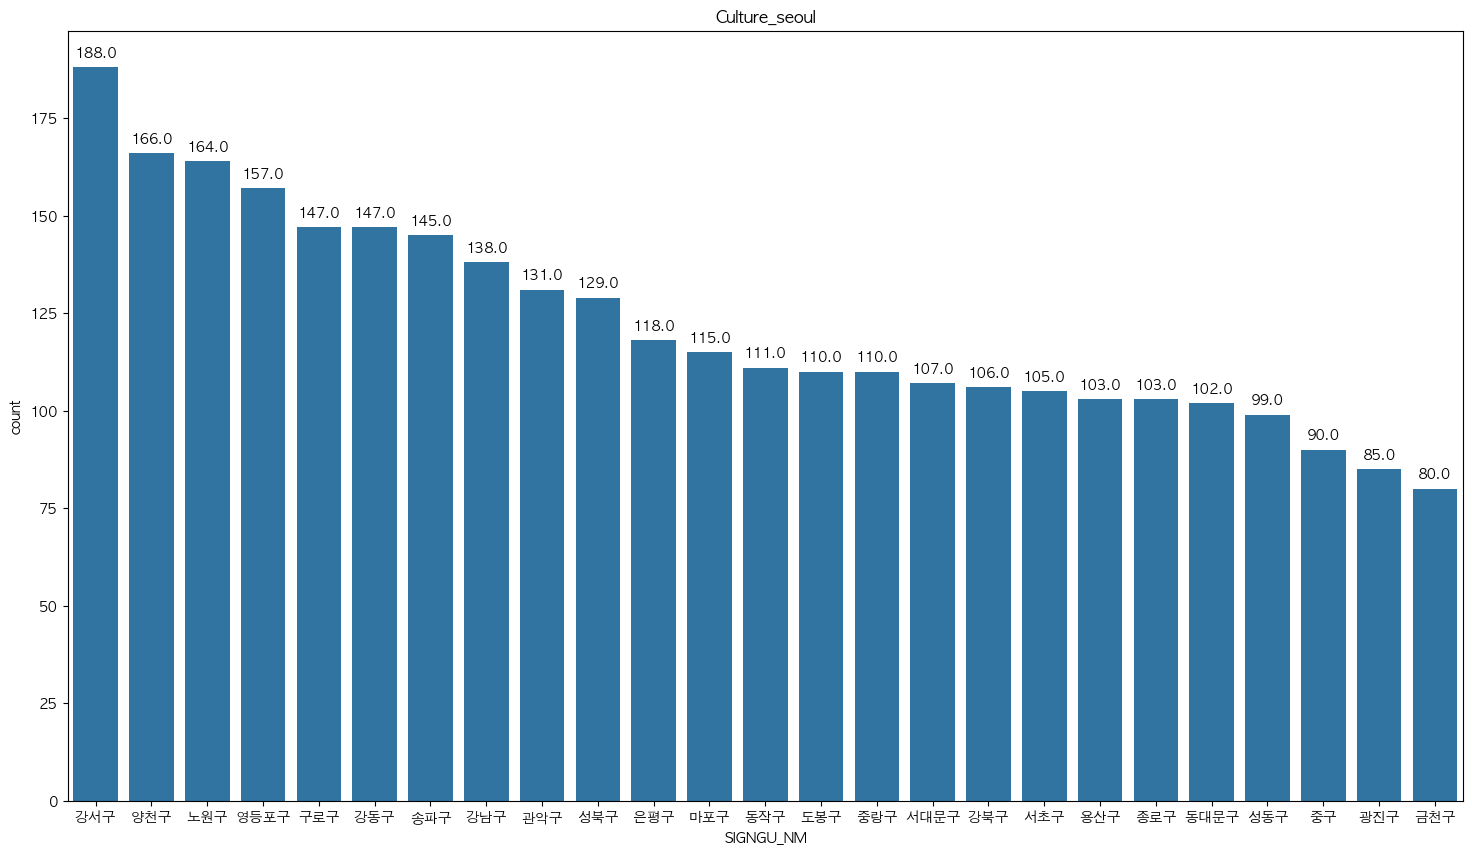

In [22]:
# SIGNGU_NM의 카테고리별 개수를 계산하고 오름차순으로 정렬
order = culture_seoul['SIGNGU_NM'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(18, 10))
ax = sns.countplot(data=culture_seoul, x='SIGNGU_NM', order=order)

# 값 레이블 추가
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title("Culture_seoul")
plt.show()


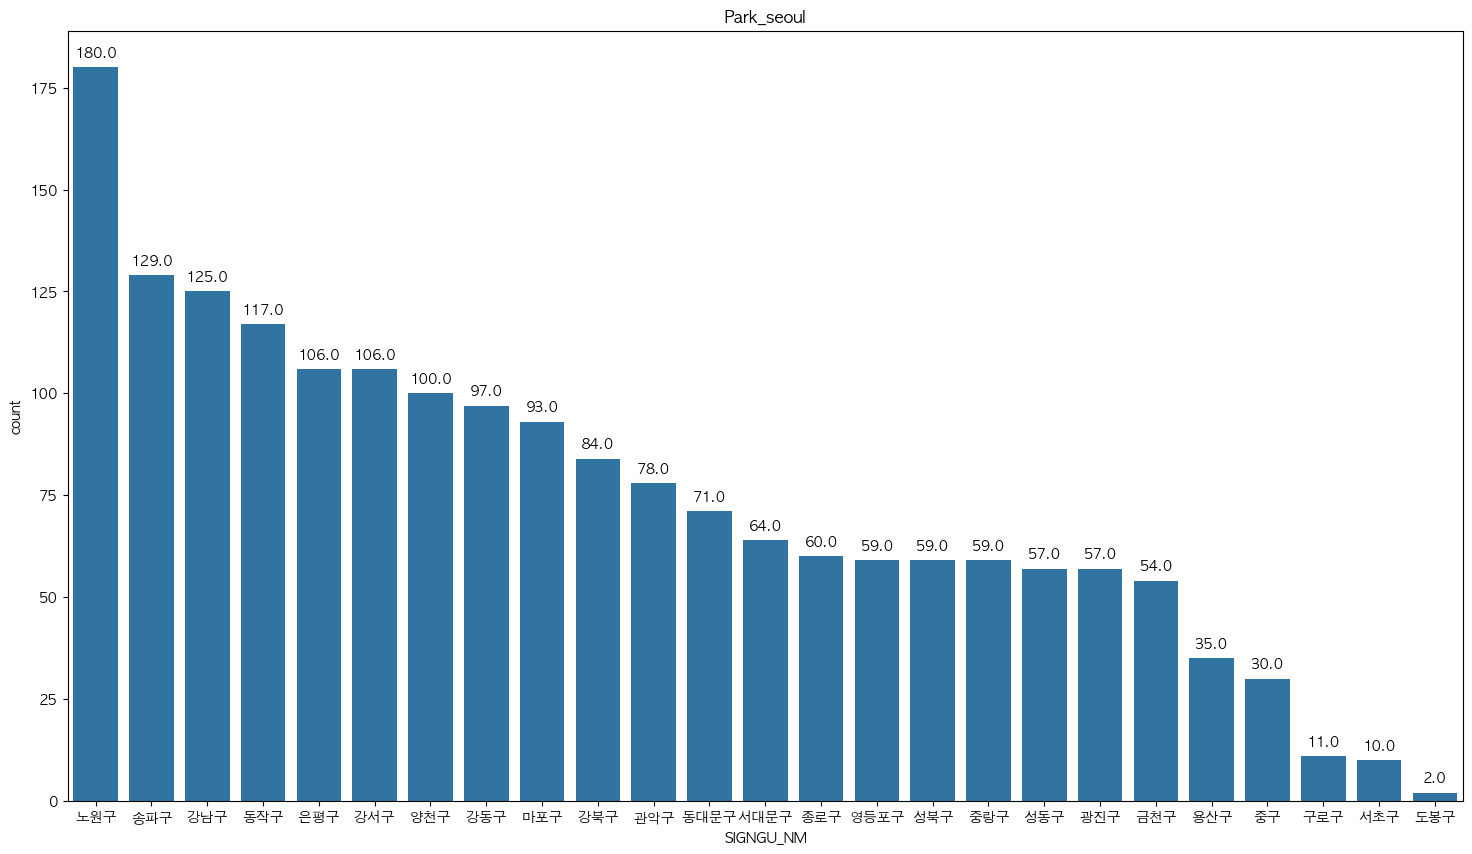

In [23]:
# SIGNGU_NM의 카테고리별 개수를 계산하고 오름차순으로 정렬
order = park_seoul['SIGNGU_NM'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(18, 10))
ax = sns.countplot(data=park_seoul, x='SIGNGU_NM', order=order)

# 값 레이블 추가
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title("Park_seoul")
plt.show()

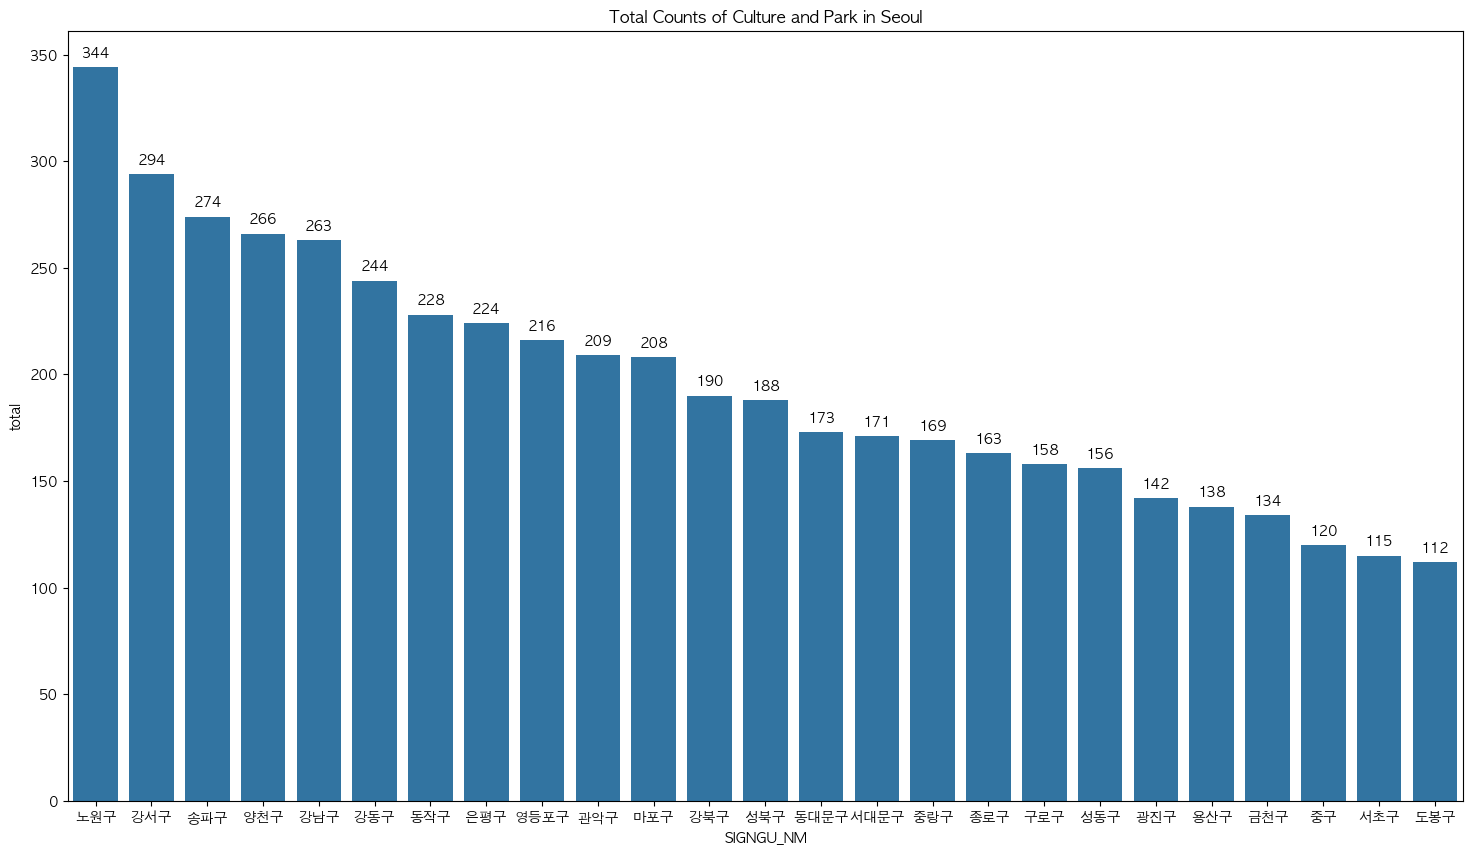

In [35]:
import pandas as pd

# culture_seoul과 park_seoul에서 SIGNGU_NM별 카운트 계산
culture_counts = culture_seoul['SIGNGU_NM'].value_counts()
park_counts = park_seoul['SIGNGU_NM'].value_counts()

# 두 카운트를 더하기 위해 하나의 DataFrame으로 결합
total_counts = pd.DataFrame({
    'culture': culture_counts,
    'park': park_counts
}).fillna(0)  # 결측치는 0으로 채움

# culture와 park의 값을 더한 새로운 열을 추가
total_counts['total'] = total_counts['culture'] + total_counts['park']

# total_counts를 total 값으로 오름차순 정렬
total_counts = total_counts.sort_values(by='total', ascending=False)

# 정렬된 index를 사용하여 countplot 그리기
plt.figure(figsize=(18, 10))
ax = sns.barplot(x=total_counts.index, y=total_counts['total'])

# 값 레이블 추가
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title("Total Counts of Culture and Park in Seoul")
plt.show()

In [29]:
old_point.head()

,구별,합계,남자,여자
0,종로구,267.8,237.3,298
1,중구,286.5,245.3,329.3
2,용산구,200.7,172.2,230
3,성동구,193.4,167.5,219.9
4,광진구,211.1,183.7,240.1


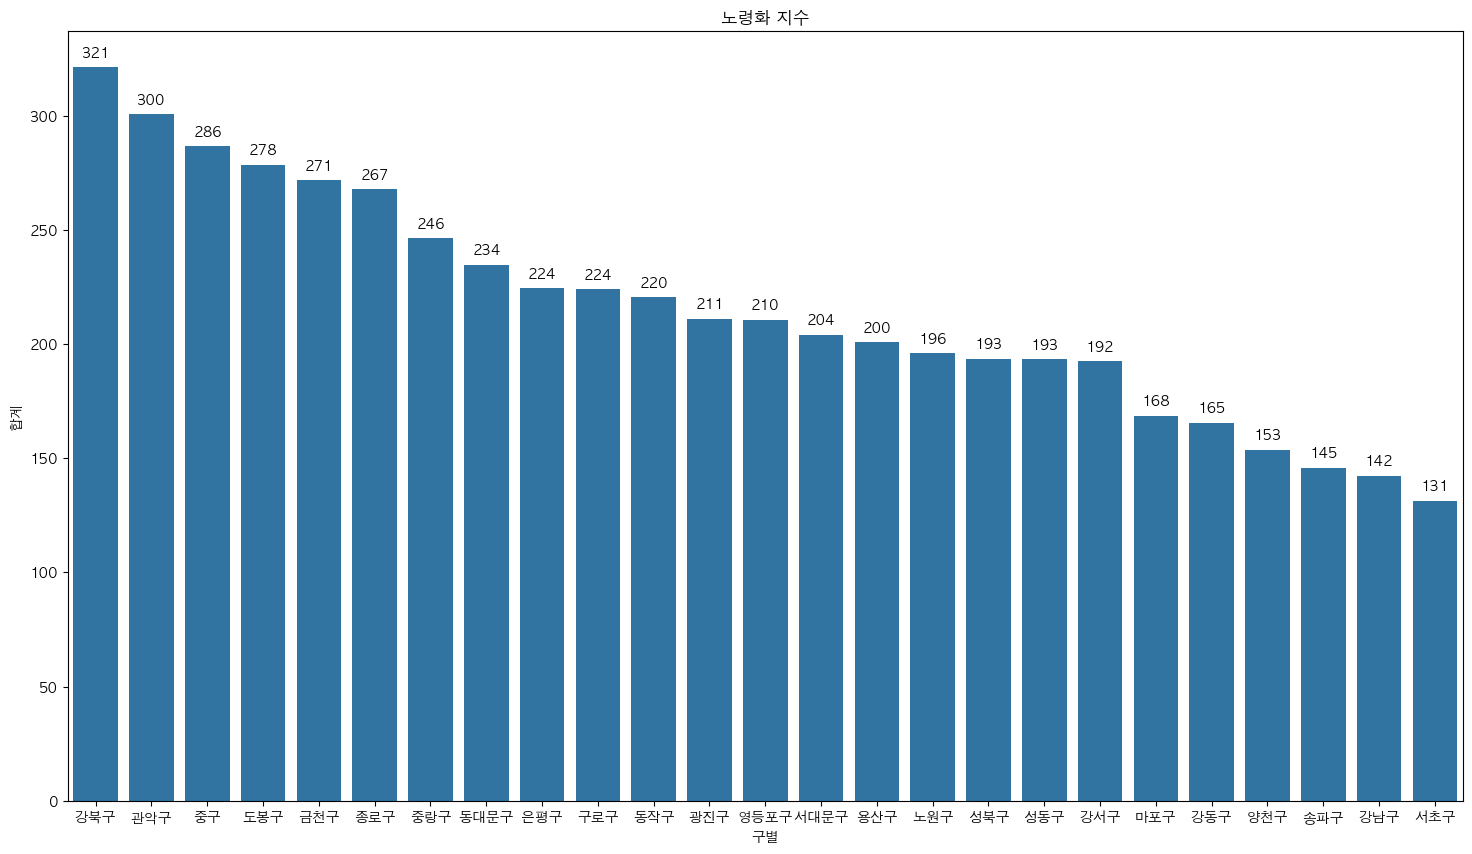

In [34]:
sorted_order = old_point.sort_values(by='합계', ascending=False)['구별']

plt.figure(figsize=(18, 10))
ax = sns.barplot(data=old_point, x='구별', y='합계', order=sorted_order)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')
plt.title("노령화 지수")
plt.show()